# MNIST Dimensionality Reduction using PCA

### **Project Overview**  
This project explores dimensionality reduction on the **MNIST dataset** (Handwritten Digits) using **Principal Component Analysis (PCA)** implemented from scratch. By transforming data from 784 dimensions down to a 2D plane, we visualize the inherent clusters of different digits and analyze how much variance is preserved during the compression process.

### **1. Useful packages**

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

### **2. Data**

Loading the MNIST dataset

In [16]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

We implement the PCA algorithm from scratch using `NumPy`. The process involves centering the data, computing the covariance matrix, and performing eigenvalue decomposition to identify the principal components that capture the most variance.

In [17]:
class PCA:
    def __init__(self):
        self.V = None
        self.mean = None

    def fit(self, X):
        """
        Fits the PCA model by calculating the principal components.
        """
        # Center the data and store the mean for later use
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # Calculate the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)
        
        # Eigenvalue decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort eigenvectors by eigenvalues in descending order
        order = np.argsort(eigenvalues)[::-1]
        self.V = eigenvectors[:, order]

    def transform(self, X, n_dimensions):
        """
        Projects the data onto the top n_dimensions principal components.
        """
        # Center the data using the mean calculated during fit
        X_centered = X - self.mean
        
        # Project the data
        X_reduced = np.dot(X_centered, self.V[:, :n_dimensions])
        
        return X_reduced

We apply the PCA model to the MNIST dataset, reducing the dimensions for further analysis.

In [18]:
# Initializing the model and fitting it to the MNIST data
pca = PCA()
pca.fit(X)

# Reducing the dataset to the top 2 principal components for visualization
X_reduced = pca.transform(X, 2)

We plot the data in the 2D principal component space to visualize the separation and clustering of the different digit classes.

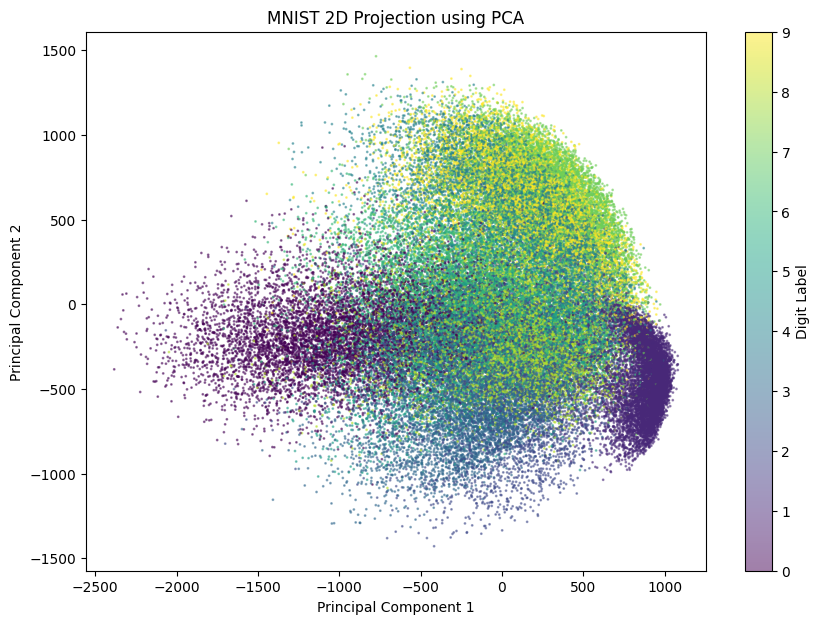

In [19]:
# Converting labels to integers for color mapping
y = [int(label) for label in y]

# Plotting the 2D projection
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.5, s=1)

# Adding a colorbar to identify the digits
cbar = fig.colorbar(scatter)
cbar.set_label('Digit Label')

# Labeling the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('MNIST 2D Projection using PCA')

plt.show()

To verify our PCA implementation, we analyze the properties of the principal components matrix $V \in \mathbb{R}^{d \times r}$. We visualize two products:
1. $V^TV$: This check confirms whether our principal components are orthonormal.
2. $VV^T$: This represents the projection matrix back into the original feature space.

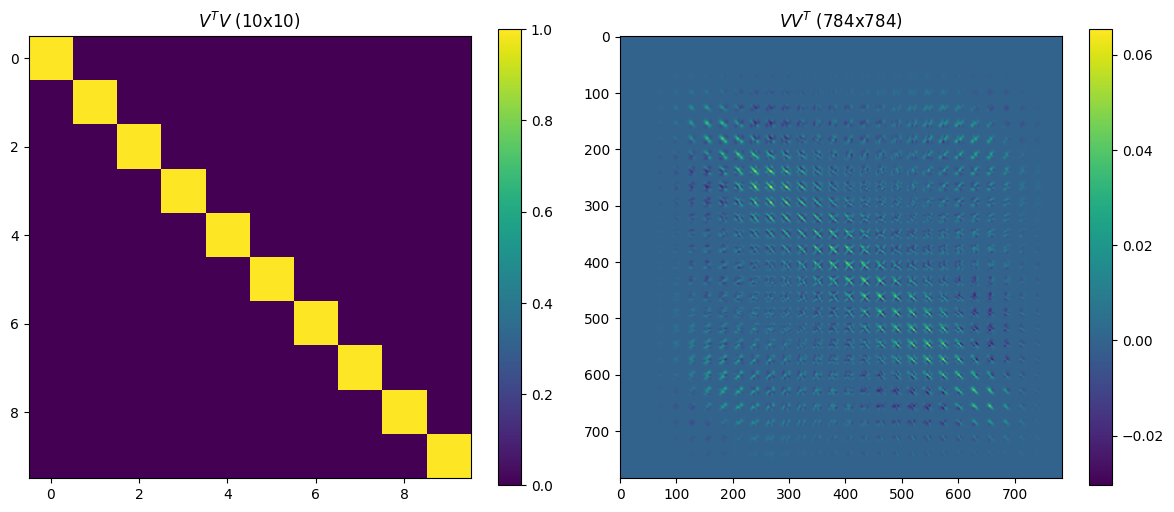

In [20]:
# Selecting the top 10 principal components
V10 = pca.V[:, :10]
V10T = V10.T

# Computing the two products
V10T_V10 = V10T @ V10  # Dimension: 10x10
V10_V10T = V10 @ V10T  # Dimension: 784x784

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting V^T * V - Should be an Identity Matrix
im1 = ax[0].imshow(V10T_V10, cmap='viridis')
ax[0].set_title('$V^T V$ (10x10)')
fig.colorbar(im1, ax=ax[0])

# Plotting V * V^T - The projection matrix back to pixel space
im2 = ax[1].imshow(V10_V10T, cmap='viridis')
ax[1].set_title('$V V^T$ (784x784)')
fig.colorbar(im2, ax=ax[1])

plt.tight_layout()
plt.show()

Based on the visualized matrices above, we can draw the following conclusions:

* **On the left ($V^T V$):** $V^T V = I$ (the Identity Matrix) for $r \times r$ dimensions. The visualization clearly shows the unit matrix, confirming that our principal components are orthonormal.
* **On the right ($V V^T$):** This represents the projection matrix in the original 784-dimensional space. It shows how the data is projected onto the 10-dimensional subspace spanned by the top eigenvectors. Unlike the identity matrix, this matrix captures the underlying structure and correlations between pixels as represented in the reduced subspace.

To understand how much information is preserved, we implement a reconstruction function. This function projects the data to a lower-dimensional space and then maps it back to the original 784-dimensional space.

In [21]:
def pca_reconstruction(x, n_dimensions):
    """
    Projects a sample to n-dimensions and reconstructs it back to original space.
    """
    # Select the top n eigenvectors
    V = pca.V[:, :n_dimensions]
    
    # 1. Center the data (using the global dataset mean)
    mean_X = np.mean(X, axis=0)
    x_centered = x - mean_X
    
    # 2. Project to reduced space (Compression)
    x_reduced = x_centered @ V
    
    # 3. Project back to original space (Decompression)
    x_reconstructed = x_reduced @ V.T
    
    # 4. Add the mean back
    x_reconstructed = x_reconstructed + mean_X
    
    return x_reconstructed

We select a random digit and observe how the quality of the reconstruction improves as we increase the number of principal components used.

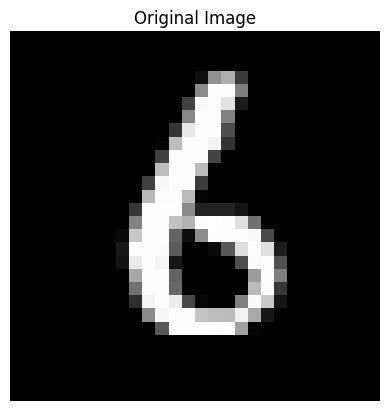

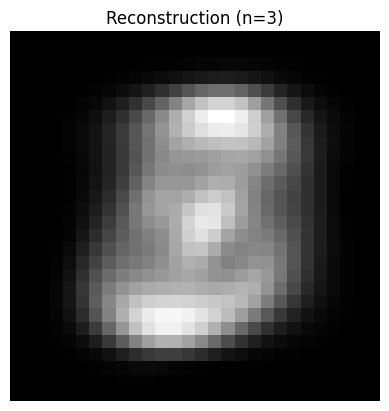

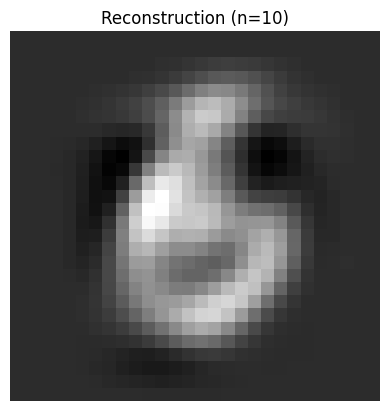

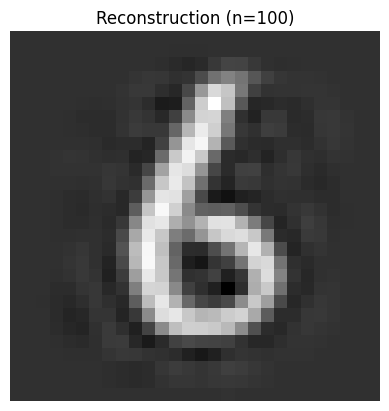

In [22]:
# Selecting a random sample from the dataset
i = np.random.randint(0, X.shape[0])
x_sample = X[i]

def show_image(img, title):
    """Helper function to reshape and display MNIST images."""
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the original image
show_image(x_sample, "Original Image")

# Reconstructing from different dimensional spaces
dimensions = [3, 10, 100]

for dim in dimensions:
    x_reconstructed = pca_reconstruction(x_sample, dim)
    show_image(x_reconstructed, f"Reconstruction (n={dim})")